In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#chargeons nos données
df= pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [266]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [267]:
# Affichage de la structure des données
df.shape

(10000, 14)

In [268]:
#Affichage des colonnes
#df.columns
df.columns.values

array(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'], dtype=object)

In [269]:
#Affichage des indices
df.index

#c'est important de verifier nos indices s'il s'agit de date ou des entiers


RangeIndex(start=0, stop=10000, step=1)

In [270]:
#verification de l"existence des valeurs manquantes
df.isna().sum() #on peut faire isnull()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [271]:
# comparaison quantitative entre la moyenne et la mediane

abs ((df.mean()- df.median()) / df.mean() ) * 100

/tmp/ipykernel_326761/533070349.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  abs ((df.mean()- df.median()) / df.mean() ) * 100


RowNumber            0.000000
CustomerId           0.001291
CreditScore          0.226154
Age                  4.937593
Tenure               0.255346
Balance             27.080355
NumOfProducts       34.649065
HasCrCard           41.743444
IsActiveMember      94.137061
EstimatedSalary      0.103582
Exited             100.000000
dtype: float64

#### Si l'ecart est important cela signifie qu'il y a presence de valeurs aberantes. c'est le cas pour la variable balance et Numofprocuct

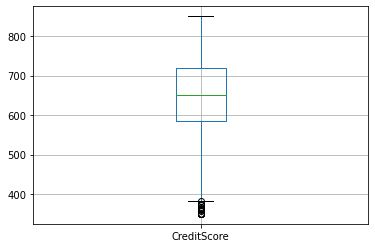

In [272]:
#UTILISATION des diagrammes à moustaches
#df.columns
#df[["CreditScore","Age"]].boxplot()
df[["CreditScore"]].boxplot();

<AxesSubplot:>

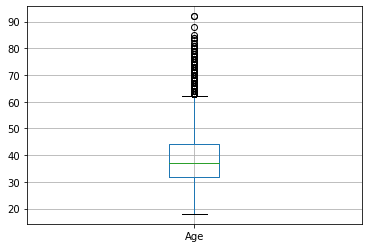

In [273]:
df[["Age"]].boxplot()

 #### Theoreme des valeurs extremes
  ##### borne sup
 $ (Q3-Q1)*1.5 + Q3 $ 
 ##### borne inf
 $ Q1 - (Q3-Q1)*1.5 $

#### L'etude des boxplots et la comparaison entre les valeurs moy et les medianes montrent l'exixtence des valeurs aberantes. On se propose dans le reste de garder ces clients

In [274]:
#repartition de notre variable cible
df["Exited"].value_counts()  # 1 qui ont quitté et 0 ceux qui sont resté

0    7963
1    2037
Name: Exited, dtype: int64

/home/moustaphe/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


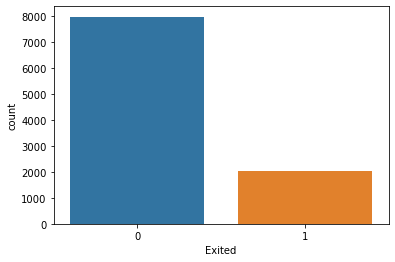

In [275]:
sns.countplot(df["Exited"]);

/home/moustaphe/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


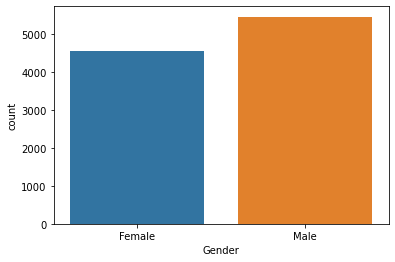

In [276]:
sns.countplot(df["Gender"]);

In [277]:
#claculons le % des clients qui ont quitté la banque
nomb_rest=df[ df["Exited"]== 0 ].shape[0] #semblable une requete where en sql
nomb_part=df[ df["Exited"]== 1 ].shape[0]

#Affichage des pourcentages
print(nomb_rest/(nomb_rest+nomb_part) * 100,"% des clients qui restent")
print(nomb_part/(nomb_rest+nomb_part) * 100,"% des clients qui quittent")

79.63 % des clients qui restent
20.369999999999997 % des clients qui quittent


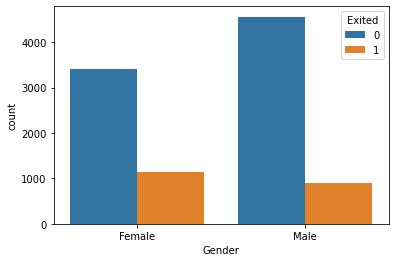

In [278]:
#Quantifions l'effet du sexe sur la variable cible 
sns.countplot(x="Gender",hue="Exited",data=df);

##### On remarque que malgre les femmes sont minoritaires dans le lot des données, le nbre de femmes qui quittent l'entreprisent est superieur à celui des hommes. 

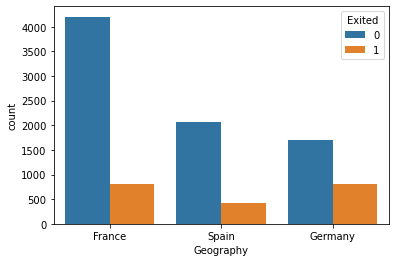

In [279]:
#interessons nous à la variable geography
sns.countplot(x="Geography",hue="Exited",data=df);


In [280]:
#Affichons les chiffres selon la zone geographic

pd.crosstab(df["Geography"],df["Exited"],margins=True)

Exited,0,1,All
Geography,,,
France,4204,810,5014
Germany,1695,814,2509
Spain,2064,413,2477
All,7963,2037,10000


#### Mefions nous conclusions tirées à partir des graphes car on remarque que les Allemands quittent plus que les autres contrairema à ce qu'on pensait avec les graphes

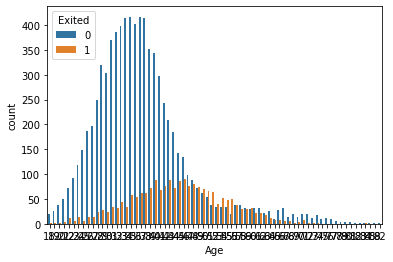

In [281]:
#variable age
sns.countplot(x="Age",hue="Exited",data=df);

In [282]:
pd.crosstab(df["Age"],df["Exited"],margins=True)

Exited,0,1,All
Age,,,
18,20,2,22
19,26,1,27
20,38,2,40
21,50,3,53
22,72,12,84
...,...,...,...
84,1,1,2
85,1,0,1
88,1,0,1


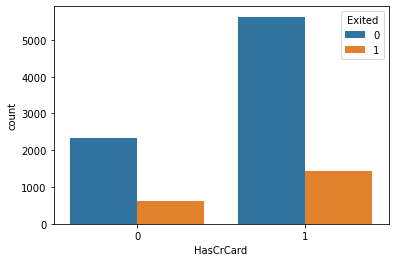

In [283]:
#Etude de la variable Hascrcard
sns.countplot(x="HasCrCard",hue="Exited",data=df);

In [284]:
pd.crosstab(df["HasCrCard"],df["Exited"],margins=True)

Exited,0,1,All
HasCrCard,,,
0,2332,613,2945
1,5631,1424,7055
All,7963,2037,10000


In [285]:
#comment selectionner les variables quantitatives
df.select_dtypes(exclude=object).columns
#pour obtenir seulement les qualitatives
df.select_dtypes(include=object)

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female
...,...,...,...
9995,Obijiaku,France,Male
9996,Johnstone,France,Male
9997,Liu,France,Female
9998,Sabbatini,Germany,Male


In [286]:
df.shape

(10000, 14)

## Modélisation des données

In [4]:
#suppression des colonnes non imôrtantes
df.drop(columns= ["RowNumber","CustomerId","Surname"],inplace=True)

In [5]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [6]:
# Encodage des colonnes qualitatives
#encodage Geography
df['Geography'].replace({'France':0, 'Spain':1,'Germany':2},inplace = True)

In [7]:
#pd.get_dumnies(df[["Geography", "Gender"]],drop_first= True)

In [8]:
#Encodage de la variable sexe
df["Gender"].replace({'Female':0, 'Male':1}, inplace = True)

In [9]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,2,1,42,3,75075.31,2,1,0,92888.52,1


#### Remarque: L'application d'une ACP sur des variables continues et discretes ne donne pas de bons resultats donc il faut faire appel à ACM

In [10]:
# Separation des variables avec la variable cible
X= df.iloc[:,0:-1]
y= df.iloc[:,-1]

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=1)
x_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2694,628,2,1,29,3,113146.98,2,0,1,124749.08
5140,626,0,0,29,4,105767.28,2,0,0,41104.82
2568,612,2,0,47,6,130024.87,1,1,1,45750.21
3671,646,2,0,52,6,111739.40,2,0,1,68367.18
7427,714,1,1,33,8,122017.19,1,0,0,162515.17
...,...,...,...,...,...,...,...,...,...,...
2895,621,2,1,47,7,107363.29,1,1,1,66799.28
7813,684,2,0,63,3,81245.79,1,1,0,69643.31
905,672,0,0,45,9,0.00,1,1,1,92027.69
5192,663,0,0,39,8,0.00,2,1,1,101168.90


In [12]:
#Normalisation des données
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)
x_train_sc


array([[-0.23082038,  1.49644863,  0.91509065, ..., -1.55337352,
         0.97725852,  0.42739449],
       [-0.25150912, -0.90651986, -1.09278791, ..., -1.55337352,
        -1.02327069, -1.02548708],
       [-0.3963303 ,  1.49644863, -1.09278791, ...,  0.64376017,
         0.97725852, -0.94479772],
       ...,
       [ 0.22433188, -0.90651986, -1.09278791, ...,  0.64376017,
         0.97725852, -0.14096853],
       [ 0.13123255, -0.90651986, -1.09278791, ...,  0.64376017,
         0.97725852,  0.01781218],
       [ 1.1656695 ,  1.49644863,  0.91509065, ...,  0.64376017,
        -1.02327069, -1.15822478]])

####  fitt calcule les valeurs moyennes et ecart_type variable par variable
#### transform applique $ Z = \frac{x-moy}{ecart type} $
##### On applique à x_test les valeurs moyennes et ecart types de x_train et notons que les estimateurs sont calculés à partir de x_train

In [13]:
# y.value_counts(normalize=True)

In [14]:
# len(list(y_train.values))

##### On remarque un desequilibre sur la variable cible donc il faut le gerer

In [15]:
# # Methode de sur-echantillonnage
# from sklearn.utils import resample
# x2=x_train
# x2['Exited']=y_train.values
# x2

In [16]:
# minority= x2[x2.Exited==1]
# majority= x2[x2.Exited==0]

# minority_upsampled=resample(minority,replace=True,n_samples=len(majority))
# minority_upsampled

In [17]:
# print(minority_upsampled.shape)
# print(majority.shape)

In [18]:
# #on vient d'equilibrer les deux classes
# #mtn on concat
# df_new=pd.concat([majority,minority_upsampled])

In [19]:
# df_new.Exited.value_counts(normalize=True)

In [20]:
# x_train_up=df_new.drop('Exited',axis=1)
# y_train_up=df_new['Exited']

### Modelisation à l aide de l algorithme Arbre de decision

#### Cet algo permet de realiser une classification et une regression 

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(criterion="entropy") #ou Gini mais aussi on peut fixer l'aleatoire avec random_state=1

In [22]:
#Entrainement
dt.fit(x_train_sc,y_train)

DecisionTreeClassifier(criterion='entropy')

In [23]:
#test
y_pred=dt.predict(x_test_sc)

In [24]:
y_pred.shape

(2000,)

In [25]:
#comparons y_pred et y_test
bn_pred=sum(y_pred == y_test)

In [26]:
#calcul du score basé sur l'accuaracy
sc= bn_pred/y_test.shape[0]
sc

0.7875

In [27]:
#Evaluation 
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1367,  218],
       [ 207,  208]])

##### Signification Faux_Positive

##### Un algorithme qui a un bon score et donne bcp de Faux Negatifs est un mauvais algorithme

In [28]:
#On peut utiliser aussi un rapport de classification
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1585
           1       0.49      0.50      0.49       415

    accuracy                           0.79      2000
   macro avg       0.68      0.68      0.68      2000
weighted avg       0.79      0.79      0.79      2000



In [29]:
#traçons l arbre de decision
#nombre de noeuds
dt.tree_.node_count

2189

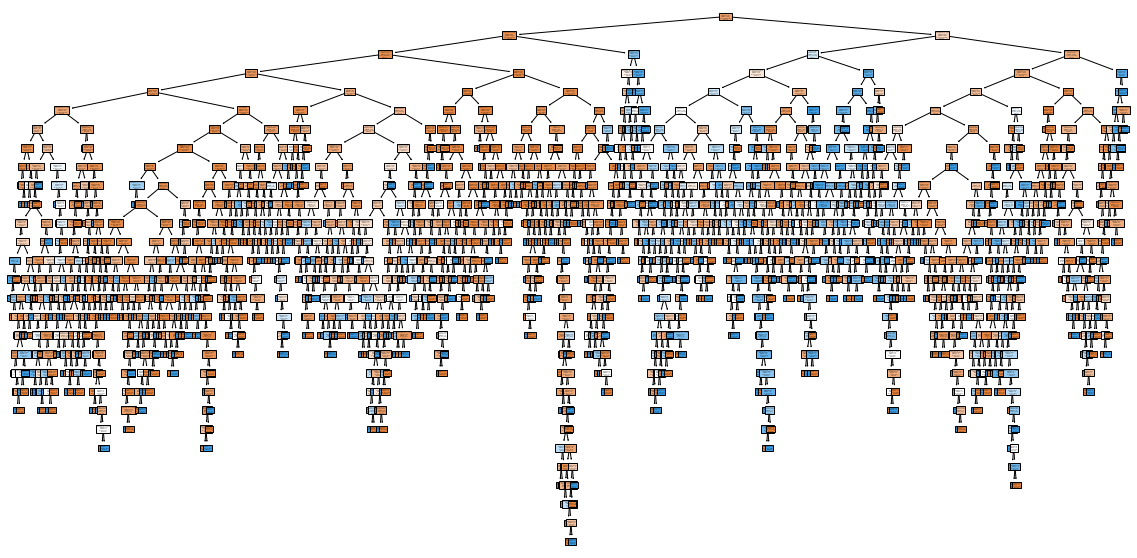

In [30]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dt,feature_names=list(X.columns),class_names=["0","1"], filled=True);

In [31]:
from sklearn.tree import export_text
print(export_text(dt,feature_names=list(X.columns), show_weights =True))

|--- Age <= 0.25
|   |--- NumOfProducts <= 1.66
|   |   |--- NumOfProducts <= -0.05
|   |   |   |--- Geography <= 0.90
|   |   |   |   |--- Balance <= -0.06
|   |   |   |   |   |--- IsActiveMember <= -0.02
|   |   |   |   |   |   |--- Tenure <= -1.22
|   |   |   |   |   |   |   |--- CreditScore <= 0.75
|   |   |   |   |   |   |   |   |--- Age <= -0.13
|   |   |   |   |   |   |   |   |   |--- weights: [22.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- Age >  -0.13
|   |   |   |   |   |   |   |   |   |--- CreditScore <= -0.47
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |   |   |   |--- CreditScore >  -0.47
|   |   |   |   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- CreditScore >  0.75
|   |   |   |   |   |   |   |   |--- Gender <= -0.09
|   |   |   |   |   |   |   |   |   |--- CreditScore <= 1.43
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   

##### Comment enregister notre arbre de décision en format image

In [ ]:
#on installe pydotplus via la commande pip install

In [41]:
from IPython.display import Image
from sklearn import tree
import pydotplus

In [42]:
#creation DOT data
dot_data=tree.export_graphviz(dt,out_file=None,
                              feature_names=X.columns,
                              class_names=["0","1"])


graph= pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
graph.write_pdf("tree.pdf")
graph.write_png("tree.png")


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.542536 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.542536 to fit



True